### 准备Python运行环境

In [ ]:
# 如果未安装 python 环境和相关库，请先运行
# 如果已经成功安装，不需要运行
! pip install networkx
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn

In [1]:
# 自动屏蔽不必要的报错信息
import warnings
warnings.filterwarnings("ignore")

# 导入相关库
from collections import Counter
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import networkx as nx

### Zachary 空手道俱乐部的社团结构

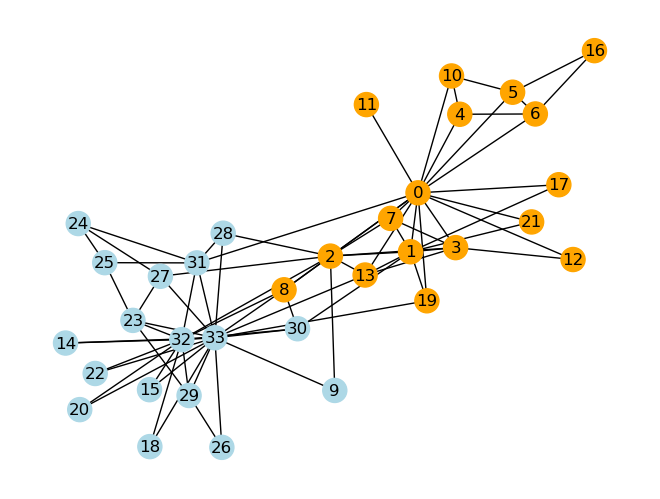

In [2]:
G_karate = nx.karate_club_graph()

pos=nx.fruchterman_reingold_layout(G_karate, seed=8)
club_color = {
    'Mr. Hi': 'orange',
    'Officer': 'lightblue',
}
node_colors = [club_color[G_karate.nodes[n]['club']] for n in G_karate.nodes]
nx.draw(G_karate, pos=pos, node_color=node_colors, with_labels=True)

### 实证划分 Empirical partition

根据 Zachary 的调查结果，划分为两个社团。

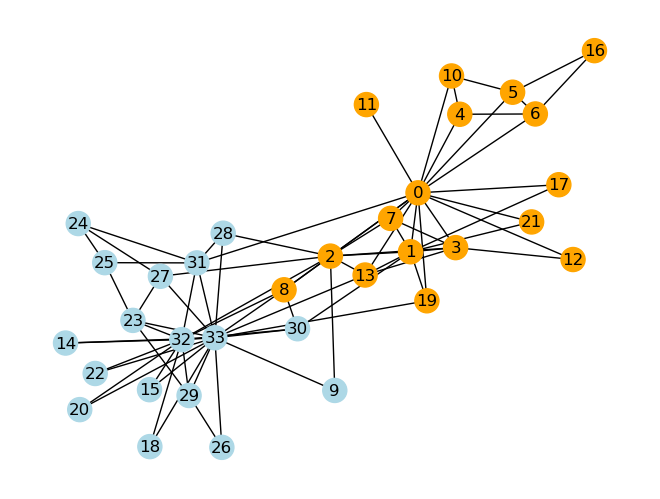

In [3]:
club_color = {
    'Mr. Hi': 'orange',
    'Officer': 'lightblue',
}
node_colors = [club_color[G_karate.nodes[n]['club']] for n in G_karate.nodes]
nx.draw(G_karate, pos=pos, node_color=node_colors, with_labels=True)

In [4]:
groups = {
    'Mr. Hi': set(),
    'Officer': set(),
}

for n in G_karate.nodes:
    club = G_karate.nodes[n]['club']
    groups[club].add(n)

empirical_partition = list(groups.values())

In [5]:
nx.community.quality.modularity(G_karate, empirical_partition)

0.39143756676224206

### 随机划分 Random partition

In [6]:
random_nodes = random.sample(G_karate.nodes, 17)
random_partition = [set(random_nodes),
                    set(G_karate.nodes) - set(random_nodes)]

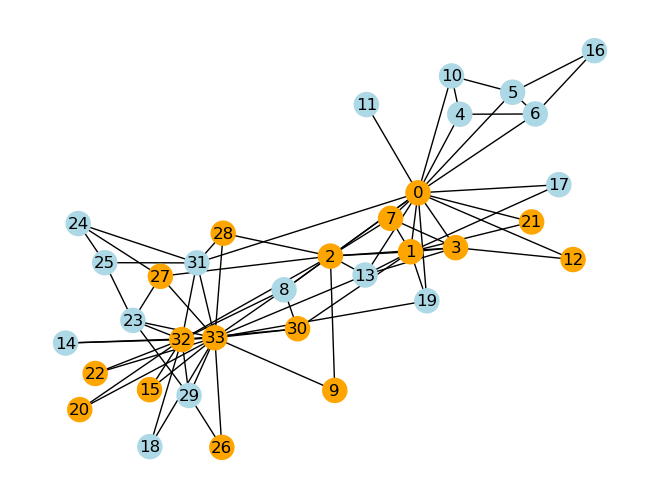

In [7]:
random_node_colors = ['orange' if n in random_nodes else 'lightblue' for n in G_karate.nodes]
nx.draw(G_karate, pos=pos, with_labels=True, node_color=random_node_colors)

In [8]:
nx.community.quality.modularity(G_karate, random_partition)

0.032120837315642525

### 最优模块度划分 Optimal partition

In [9]:
from networkx.algorithms.community import greedy_modularity_communities

In [10]:
# 模块度最大化的划分结果
optimal_partition = greedy_modularity_communities(G_karate)

In [11]:
nx.community.quality.modularity(G_karate, optimal_partition)

0.41096493693896297